## https://scikit-learn.org/stable/user_guide.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Advertising.csv")

# Veri Keşfi

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Unnamed: 0 sütununu istemiyoruz. DÜşürelim
#df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
# y değerim Sales
# X değerim TV+Radio+Newspaper

In [5]:
df['Advertising_Budget'] = df['TV'] + df['Newspaper'] + df['Radio']
df.head()

,TV,Radio,Newspaper,Sales,Advertising_Budget
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


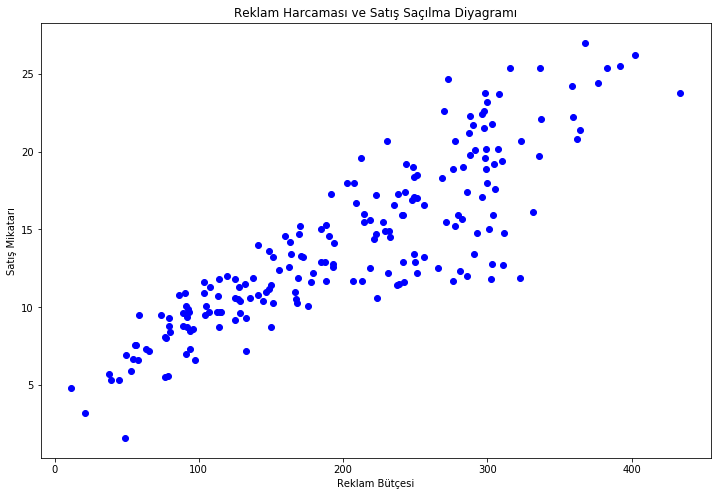

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(df['Advertising_Budget'], df['Sales'], color='blue')
plt.title("Reklam Harcaması ve Satış Saçılma Diyagramı")
plt.xlabel("Reklam Bütçesi")
plt.ylabel("Satış Mikatarı")
plt.show()

# Veri setini X ve y olarak ayırma (Dikey bölme)

In [8]:
# X (büyük X) girdileri temsil eder, input, bağımsız değişkenler, girdi nitelikler, 
# feature matrix diye de adlandırılır çünkü o bir matris
X = df['Advertising_Budget'].values.reshape(-1,1)
X.shape

(200, 1)

In [9]:
# y (küçük y) output, bağımlı değişken, hedef değişken diye adlandırılır
y = df['Sales'].values
y.shape

(200,)

# Veri setini train-test olarak ayırma (yatay bölme)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
            test_size=1/3, random_state = 142)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 1)
(67, 1)
(133,)
(67,)


# Lineer Regresyon Nesnesi Oluşturma (Boş model yaratma)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()

# Lineer modeli eğitme (modeli şekillendirme - veriye uydurma - eğitme)

In [14]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Muazzam hata burada

In [15]:
###########################################
#                                         #
#   y_pred = regressor.predict(y_test)    #
#                                         #
###########################################

# Eğitilmiş modelle (makine) test seti kullanarak tahmin

In [18]:
y_pred = regressor.predict(X_test)

## Tahmin sonuçlarını numpy.ndarray'den dataframe yapma (İncelemek daha Kolay)

In [19]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head()

,y_pred,y_test
0,18.292039,12.0
1,8.051677,8.0
2,9.042363,6.6
3,16.467607,19.0
4,22.298924,27.0


# Regression metrics

## explained_variance

In [18]:
# The sklearn.metrics module implements several loss, score, and utility functions to measure 
# regression performance. Some of those have been enhanced to handle the multioutput case: 
# mean_squared_error, mean_absolute_error, explained_variance_score and r2_score.

In [20]:
from sklearn.metrics import explained_variance_score

In [21]:
explained_variance_score(y_true=y_test, y_pred=y_pred)

0.8124074830896635

## mean_absolute_error

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
mean_absolute_error(y_true=y_test, y_pred=y_pred)

1.650903546846994

## r2_score 

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test, y_pred)

0.8089472112090957

# =========    Elle yapılan hesaplamalar     ===========

# Prediction errors

In [27]:
# Tahmin değerleri ile gerçek değerler arasındaki mesafesinin mutlak değeri
predictions['pred_error'] = abs(predictions.y_test - predictions.y_pred)
predictions.head()

,y_pred,y_test,mean_error,pred_error
0,18.292039,12.0,2.270149,6.292039
1,8.051677,8.0,6.270149,0.051677
2,9.042363,6.6,7.670149,2.442363
3,16.467607,19.0,4.729851,2.532393
4,22.298924,27.0,12.729851,4.701076


# Ortalamaya karşı hatalar

In [28]:
# Gerçek değerler ile ortalama arasındaki mesafesinin mutlak değeri
import math
predictions['mean_error'] = abs(predictions['y_test'] - predictions['y_test'].mean())
predictions.head()

,y_pred,y_test,mean_error,pred_error
0,18.292039,12.0,2.270149,6.292039
1,8.051677,8.0,6.270149,0.051677
2,9.042363,6.6,7.670149,2.442363
3,16.467607,19.0,4.729851,2.532393
4,22.298924,27.0,12.729851,4.701076


## Hataların Karesini Almak

In [29]:
predictions["pred_error_square"] = predictions['pred_error'] ** 2
predictions["mean_error_square"] = predictions['mean_error'] ** 2
predictions.head()

,y_pred,y_test,mean_error,pred_error,pred_error_square,mean_error_square
0,18.292039,12.0,2.270149,6.292039,39.589756,5.153578
1,8.051677,8.0,6.270149,0.051677,0.002671,39.314772
2,9.042363,6.6,7.670149,2.442363,5.965139,58.831190
3,16.467607,19.0,4.729851,2.532393,6.413015,22.371488
4,22.298924,27.0,12.729851,4.701076,22.100115,162.049100


# rmse elle hesaplama

In [28]:
from math import sqrt
rmse = sqrt(sum(predictions['pred_error_square']) / len(predictions['pred_error_square']))
rmse

2.1930600604204966

## r2_score el ile hesaplama

In [30]:
variace_mean_error = sum(predictions['mean_error_square']) / len(predictions['mean_error_square'])
variance_pred_error = sum(predictions['pred_error_square']) / len(predictions['pred_error_square'])

r_2 = 1- (variance_pred_error/variace_mean_error)
r_2

0.8089472112090959

# explained variance

In [31]:
import statistics
# explained_variance(y, y^) = 1 - (Var(y-y^) / Var(y))
variance_y_test = statistics.variance(predictions['y_test'])
variance_y_y_pred = statistics.variance((predictions['y_test'] / predictions['y_pred']))
expln_var = 1 - (variance_pred_error/ variance_y_test)
expln_var

0.8117987453701541

# ========= Grafik ===========

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
y_train_pred = regressor.predict(X_train)

## Eğitim Verileri ile

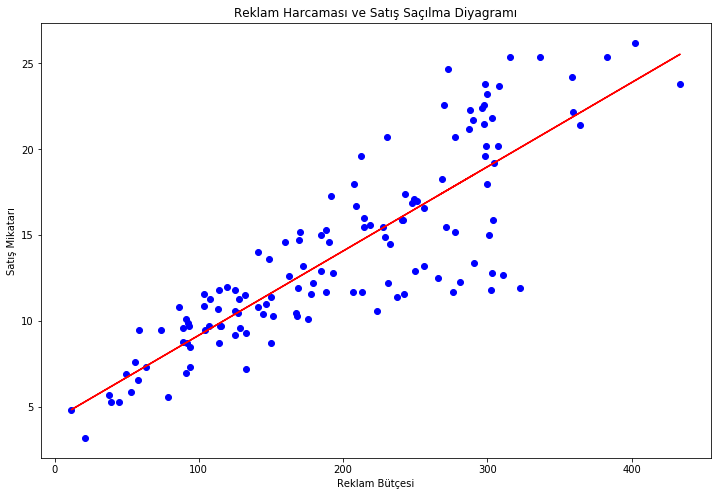

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_train_pred, color='red')
plt.title("Reklam Harcaması ve Satış Saçılma Diyagramı")
plt.xlabel("Reklam Bütçesi")
plt.ylabel("Satış Mikatarı")
plt.show()

## test Verileri ile

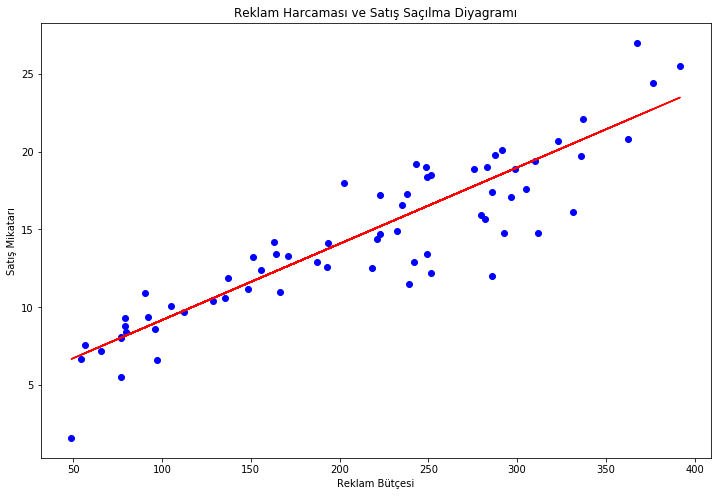

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title("Reklam Harcaması ve Satış Saçılma Diyagramı")
plt.xlabel("Reklam Bütçesi")
plt.ylabel("Satış Mikatarı")
plt.show()